# Temporal Analysis of Temperature Trends

This notebook aims to use the EDA and apply statistical methods in order to analyze the current trend of temperature, in hopes of predicting how temperature will change in the future

### Learnings:
- apply linear regression method to predict the current/future trend of temperature based on the R^2 value and slope of the graph
- apply the mann kendall test to determine if temperature has a general upward or downward trend
- based on statistical methods, evaluate whether temperature variation throughout the decades are drastically changing or not

## Set Up

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from scipy import signal
from scipy import stats
import pymannkendall as mk
import sys
import os

# Update paths to get source code from notebook_utils
curr_dir = os.path.dirname(os.path.abspath('notebooks'))
proj_dir = os.path.dirname(curr_dir)
src_path = os.path.join(proj_dir, 'src')
sys.path.append(src_path)

from notebook_utils.preprocessing import *
from notebook_utils.temporal_analysis import *

# Create combined dataframe from ghcn_cleaned files
CA_stations_dfs = combine_files_to_dfs('../data/processed/ghcn_cleaned')

Processed file: CA_2003_clean.csv
Processed file: CA_2004_clean.csv
Processed file: CA_2005_clean.csv
Processed file: CA_2006_clean.csv
Processed file: CA_2007_clean.csv
Processed file: CA_2008_clean.csv
Processed file: CA_2009_clean.csv
Processed file: CA_2010_clean.csv
Processed file: CA_2011_clean.csv
Processed file: CA_2012_clean.csv
Processed file: CA_2013_clean.csv
Processed file: CA_2014_clean.csv
Processed file: CA_2015_clean.csv
Processed file: CA_2016_clean.csv
Processed file: CA_2017_clean.csv
Processed file: CA_2018_clean.csv
Processed file: CA_2019_clean.csv
Processed file: CA_2020_clean.csv
Processed file: CA_2021_clean.csv
Processed file: CA_2022_clean.csv
Processed file: CA_2023_clean.csv


# Trend Analysis

Analyze trends in temperature data over time.

### (Maybe) Linear Regression

### (Maybe) Mann-Kendall Trend Test

# Seasonal Variations

Examine seasonal patterns and changes in temperature across different years.

### Calculate Mean Temperature by season

In [12]:
seasonal_avg = CA_stations_dfs.groupby('Season')['Temperature'].mean().round(4).reset_index()
print(seasonal_avg)

   Season  Temperature
0    Fall      16.3726
1  Spring      14.3939
2  Summer      21.2061
3  Winter       9.6668


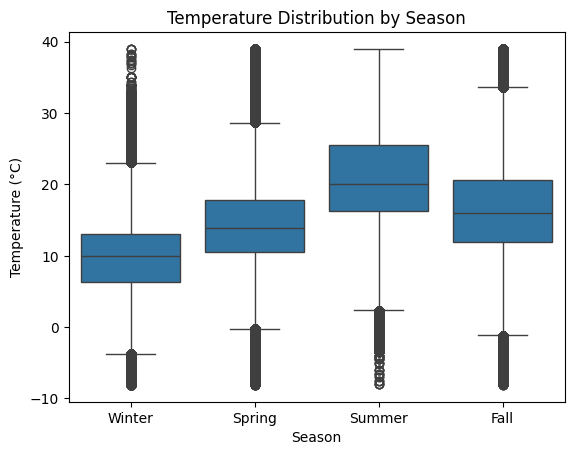

In [18]:
sns.boxplot(x='Season', y='Temperature', data=CA_stations_dfs)
plt.title('Temperature Distribution by Season')
plt.ylabel('Temperature (°C)')
plt.xlabel('Season')
plt.show()

In [21]:
from scipy import stats

seasons = CA_stations_dfs['Season'].unique()
temps_by_season = [CA_stations_dfs[CA_stations_dfs['Season'] == season]['Temperature'] for season in seasons]
anova_result = stats.f_oneway(*temps_by_season)

print('ANOVA Result:', anova_result)

ANOVA Result: F_onewayResult(statistic=1920002.2897670402, pvalue=0.0)


# Summarize Findings